<a href="https://colab.research.google.com/github/SirajShaikh96/Cardiovascular-Risk-Prediction/blob/main/cardiovascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction


##### **Project Type**    - EDA/Classification/ Supervised(Classification)
##### **Contribution**    - Individual
##### **Project By -** Siraj Shaikh


# **Project Summary -**

**As the cardio vascular risk is increase year by year. from the given data we've to predict whether or not a person will have cardio vascular risk within 10 years.**

**We are gonna do some eda to visaulize the dataset and will fnd some insight from eda, check for missing value, distribution of the features, target feature is balanced or not. Capping outliers, Balacing the target feature by SMOTE**

**After EDA, feature engineering and feature selection we'll split the dataset into training and testing set. Then we'll train multiple classification models, Hyperparameter tunning, evaluating model on the basis of classification metrics.**

**Finalizing the metric and best model on the basis of selected metric.**

# **GitHub Link -** 

# **Problem Statement**


**As the cardiovascular risk is increasing. No of patient will also increase but the no of doctors avlaible is not enough to scrutinize every report. Which is a huge problem.**  

#### **Business Objective?**

**We'll make a robust classification model which will classify whether or not a person will have cardiovascular risk within 10 years.**

**They just have to fill up required information on which model will predict whether or not a person will have cardiovascular risk within 10 years. It will increse the speed of identifying that person and reduce the cost, which will solve the problem of shortage of doctors and identifying that person at the right time and in a cost effective way.**

#Description of field

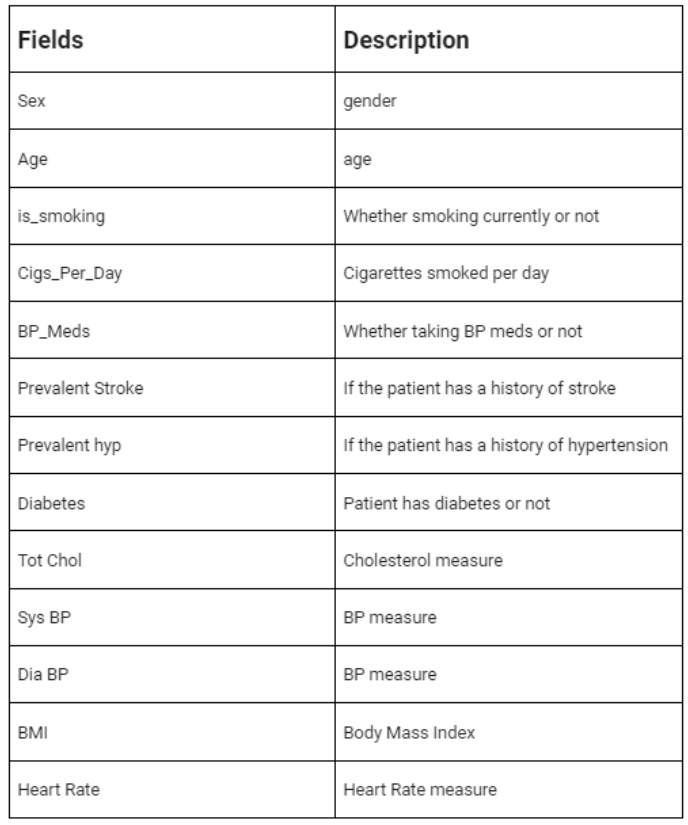


In [ ]:
#Importing Libraries 
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import file
file_path = '/content/drive/MyDrive/ML_Capstone_project/cadio_vascular/data_cardiovascular_risk.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape

(3390, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**This dataset is have some missing value, so we'll fill it with mean or median value. Or we'll gone a drop it.**

# Before filling missing value let's check the distribution of data.

In [ ]:
#import seaborn library.
import seaborn as sns

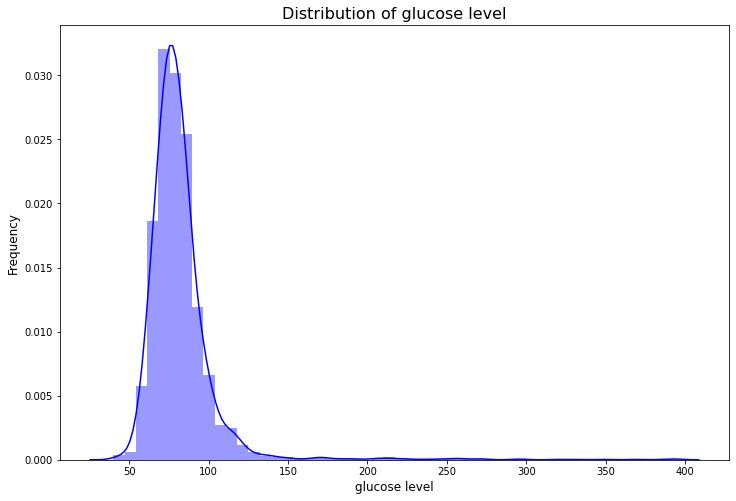

In [ ]:

plt.figure(figsize=(12,8))
sns.distplot(df['glucose'],color='blue')
plt.title('Distribution of glucose level', fontsize=16)
plt.xlabel('glucose level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**From sns distplot we can see that data is right skewed. Let's apply log10 transformation here**

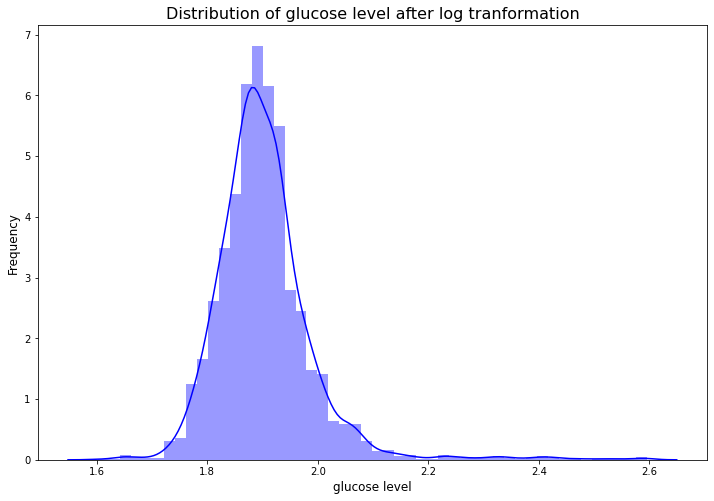

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(np.log10(df['glucose']),color='blue')
plt.title('Distribution of glucose level after log tranformation', fontsize=16)
plt.xlabel('glucose level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [ ]:
mean_glucose = df['glucose'].mean()
mean_glucose

82.08651976668827

# Here we are only filling missing value of glucose with mean value 82.08

In [ ]:
#fill missing value of glucose
df['glucose'].fillna(df['glucose'].mean(),inplace=True)

In [ ]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#Let's check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## Now there are other feature too with missing value, but missing value's are very less in those feature's, so we'll drop those row's. 

In [ ]:

#drop null row's and put it in new variable.
new_df = df.dropna()

In [ ]:
#check shape of new_df
new_df.shape

(3189, 17)

**After droping some row's with missing value's, we've 3189 row's.** 

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3189 non-null   int64  
 1   age              3189 non-null   int64  
 2   education        3189 non-null   float64
 3   sex              3189 non-null   object 
 4   is_smoking       3189 non-null   object 
 5   cigsPerDay       3189 non-null   float64
 6   BPMeds           3189 non-null   float64
 7   prevalentStroke  3189 non-null   int64  
 8   prevalentHyp     3189 non-null   int64  
 9   diabetes         3189 non-null   int64  
 10  totChol          3189 non-null   float64
 11  sysBP            3189 non-null   float64
 12  diaBP            3189 non-null   float64
 13  BMI              3189 non-null   float64
 14  heartRate        3189 non-null   float64
 15  glucose          3189 non-null   float64
 16  TenYearCHD       3189 non-null   int64  
dtypes: float64(9),

In [ ]:

new_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [ ]:
#Describe the dataset
new_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000,3189.000000
mean,1696.238946,49.423957,1.972719,9.098150,0.029476,0.005958,0.313264,0.025400,236.968642,132.436344,82.841173,25.774569,76.034180,81.946901,0.148950
std,980.899022,8.556235,1.018435,11.864621,0.169164,0.076970,0.463894,0.157361,44.537998,22.176848,11.993650,4.132848,12.056788,23.095154,0.356095
min,1.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,22.940000,68.000000,72.000000,0.000000
50%,1691.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.370000,75.000000,79.000000,0.000000
75%,2547.000000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.500000,27.990000,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Let's check the distribution of TenYearCHD feature.

In [ ]:

TenYearCHD = new_df['TenYearCHD'].value_counts()
TenYearCHD

0    2714
1     475
Name: TenYearCHD, dtype: int64

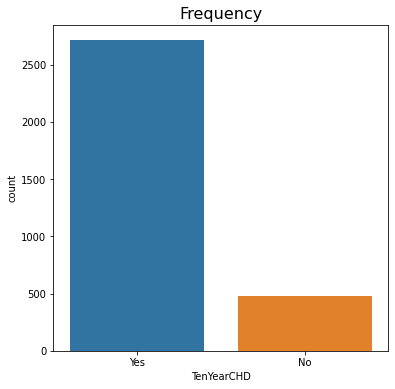

In [ ]:
#plot TenYearCHD
plt.figure(figsize=(6,6))
g = sns.countplot(x='TenYearCHD',data=new_df)
plt.title('Frequency', fontsize=16)
g.set_xticklabels(['Yes', 'No'])
plt.show()

**Above we have use count plot it helps to visualize the count or frequency of different value of a feature.**

**There is imbalance in dependent varaible. First we'll see if all metric's are good then no need of SMOTE to balance the imbalance.** 

****

# Let's see which gender smoke's more.

In [ ]:
new_df.groupby(['sex',	'is_smoking'])['sex'].count()

sex  is_smoking
F    NO            1081
     YES            715
M    NO             529
     YES            864
Name: sex, dtype: int64

**From this data we can see that male smoke's more than female but the difference is not much.**

(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'F')])

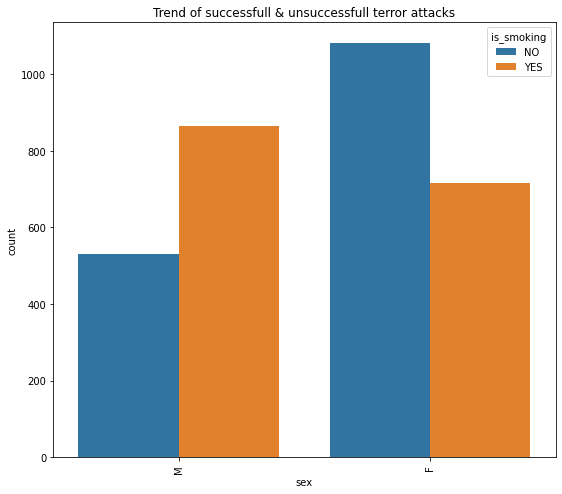

In [ ]:
plt.figure(figsize=(9,8))
sns.countplot(x='sex',hue='is_smoking',data=new_df)
plt.title('Trend of successfull & unsuccessfull terror attacks')
plt.xlabel('sex')
plt.xticks(rotation=90)

**Countplot plot is used here b'coz we can compare two feature in this chart.**

**From chart we can see that male who smoke's are more than male who do not smoke's and  female's who smoke's are less than female's who do not smoke's. Over all male smoke's more.**

#Now let's see how much cigarette's male and female smoke's per day on an average.

In [ ]:
no_of_cig_day = new_df.groupby(['sex'])['cigsPerDay'].mean()
no_of_cig_day

sex
F     5.513920
M    13.719311
Name: cigsPerDay, dtype: float64

**from this data wranggling we can see that on an average female smoke's 5.5 cigarette's per day and male smoke's 13.7 cigarette's per day.**

Text(0.5, 0, 'Sex')

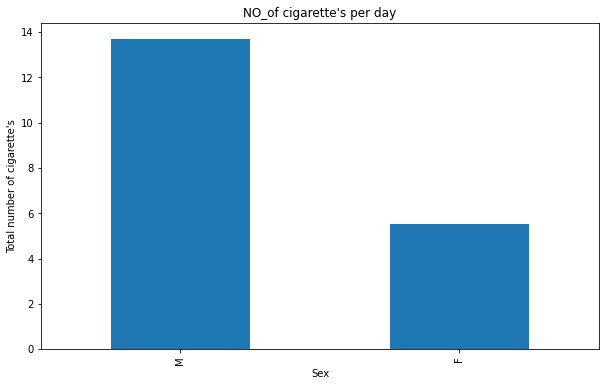

In [ ]:
plt.rcParams['figure.figsize'] = [10,6]
no_of_cig_day.sort_values(ascending=False).plot(kind='bar')

plt.title("NO_of cigarette's per day")
plt.ylabel("Total number of cigarette's")
plt.xlabel('Sex')

**Bar plot is used to compare the frequency pf smoking cigarette's between male's and female's.** 

**From the chart we can see that on an average male smoke's almost twice than female's in a day**

#Let's compare cardio vascular risk between smokers and non smokers.

In [ ]:
risk_smoke_yes = new_df.groupby(['TenYearCHD','is_smoking'])['TenYearCHD'].count()
risk_smoke_yes

TenYearCHD  is_smoking
0           NO            1390
            YES           1324
1           NO             220
            YES            255
Name: TenYearCHD, dtype: int64

Text(0.5, 0, 'Combination of smokers and non smokers with cardiovascular risk')

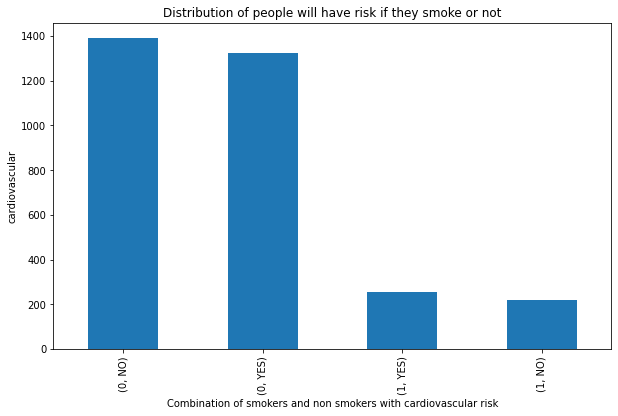

In [ ]:
#plot above output in bar plot to visaulize the data.
plt.rcParams['figure.figsize'] = [10,6]
risk_smoke_yes.sort_values(ascending=False).plot(kind='bar')

plt.title('Distribution of people will have risk if they smoke or not')
plt.ylabel('cardiovascular')
plt.xlabel('Combination of smokers and non smokers with cardiovascular risk')

**We can see that out of 3189 people, there are 255 people who smoke and will have cardiovascular risk within 10 year and 220 people who don't smoke but still they will have cardiovascular risk within 10 years. But 1324 people smoke and will not have any cardiovascular risk within 10 years.**

**From above mention data we got a insight that alone smoking is not reponsible for cardiovascular risk within 10 years. But more than 50% people smoke, who will have cardiovascular risk within 10 years.**

#Let's see if diabetes can be one of the reason for cardiovascular risk within 10 years.

In [ ]:
risk_diabetes = new_df.groupby(['TenYearCHD','diabetes'])['TenYearCHD'].count()
risk_diabetes 

TenYearCHD  diabetes
0           0           2662
            1             52
1           0            446
            1             29
Name: TenYearCHD, dtype: int64

**From this output only we can see that diabetes will not major impact on whether a person will have cardiovascular risk within 10 years.** 

#Let's check if age is the major factor of having cardiovascular risk within 10 years.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '32'),
  Text(1, 0, '33'),
  Text(2, 0, '34'),
  Text(3, 0, '35'),
  Text(4, 0, '36'),
  Text(5, 0, '37'),
  Text(6, 0, '38'),
  Text(7, 0, '39'),
  Text(8, 0, '40'),
  Text(9, 0, '41'),
  Text(10, 0, '42'),
  Text(11, 0, '43'),
  Text(12, 0, '44'),
  Text(13, 0, '45'),
  Text(14, 0, '46'),
  Text(15, 0, '47'),
  Text(16, 0, '48'),
  Text(17, 0, '49'),
  Text(18, 0, '50'),
  Text(19, 0, '51'),
  Text(20, 0, '52'),
  Text(21, 0, '53'),
  Text(22, 0, '54'),
  Text(23, 0, '55'),
  Text(24, 0, '56'),
  Text(25, 0, '57'),
  Text(26, 0, '58'),
  Text(27, 0, '59'),
  Text(28, 0, '60'),
  Text(29, 0, '61'),
  Text(30, 0, '62'),
  Text(31, 0, '63'),
  Text(32, 0, '64'),
  Text(33, 0, '65'),
  Text(34, 0, '66'),
  Text(35, 0, '67'),
  Text(36, 0, '68'),
  Text(37, 0, '69'),
  Text(38, 0, '70')])

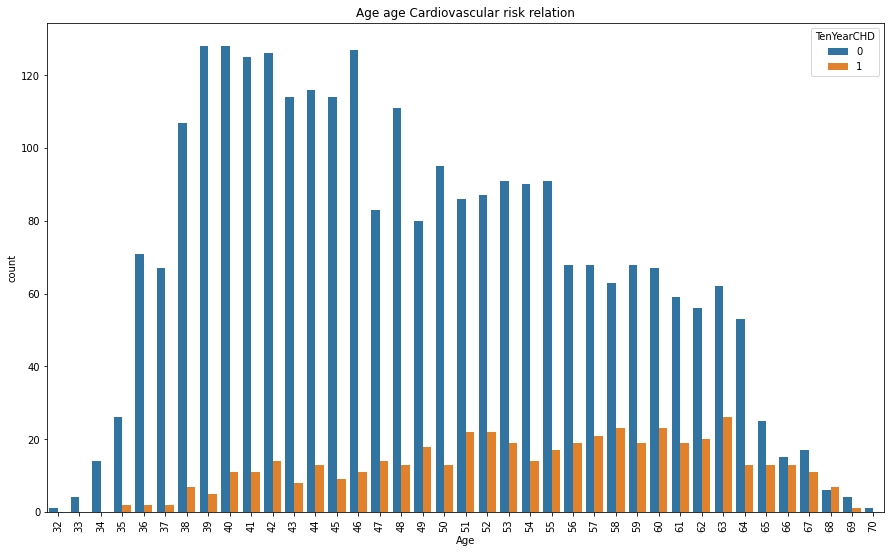

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(x='age',hue='TenYearCHD',data=new_df)
plt.title('Age age Cardiovascular risk relation')
plt.xlabel('Age')
plt.xticks(rotation=90)

**Coun plot is used to see if age is the factor of developing cardiovascular risk**

**From this plot we can clear see that certain age group have very high chance of developing cardiovascular risk within 10 years. The age group of 38-51 has very high chance of developing cardiovascular risk within 10 years.**

#Visaulize the distribution of every feature and check if there is any outlier in any feature.

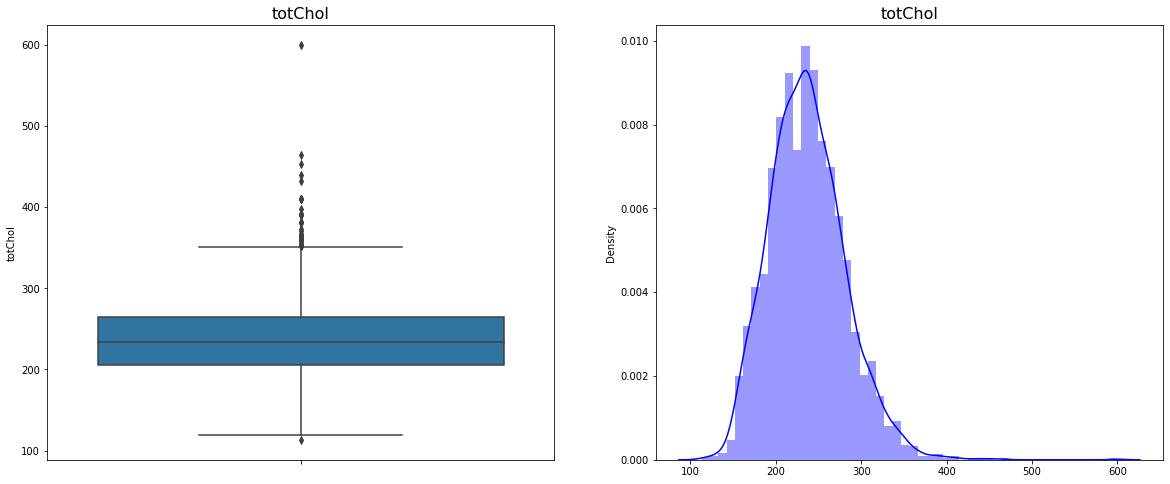

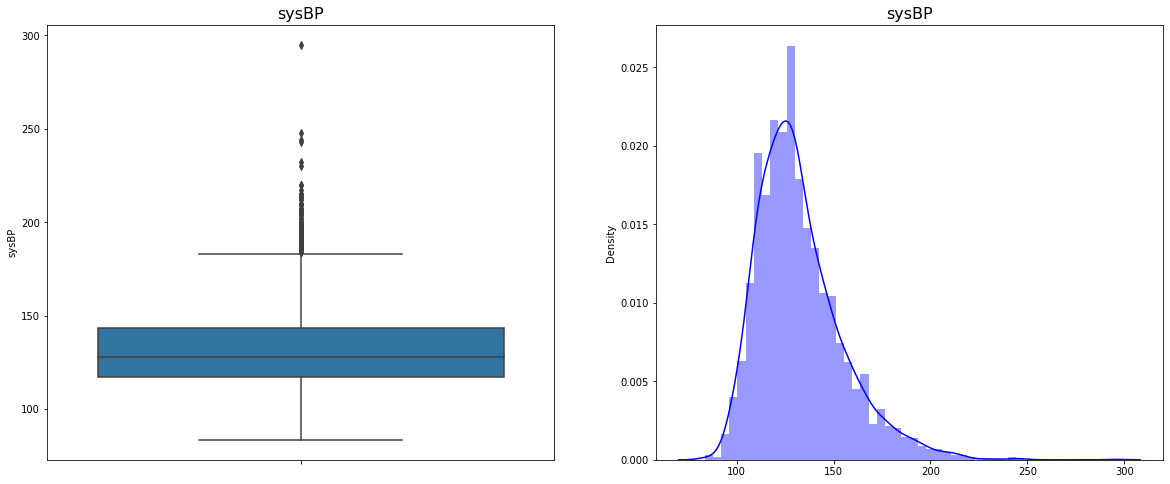

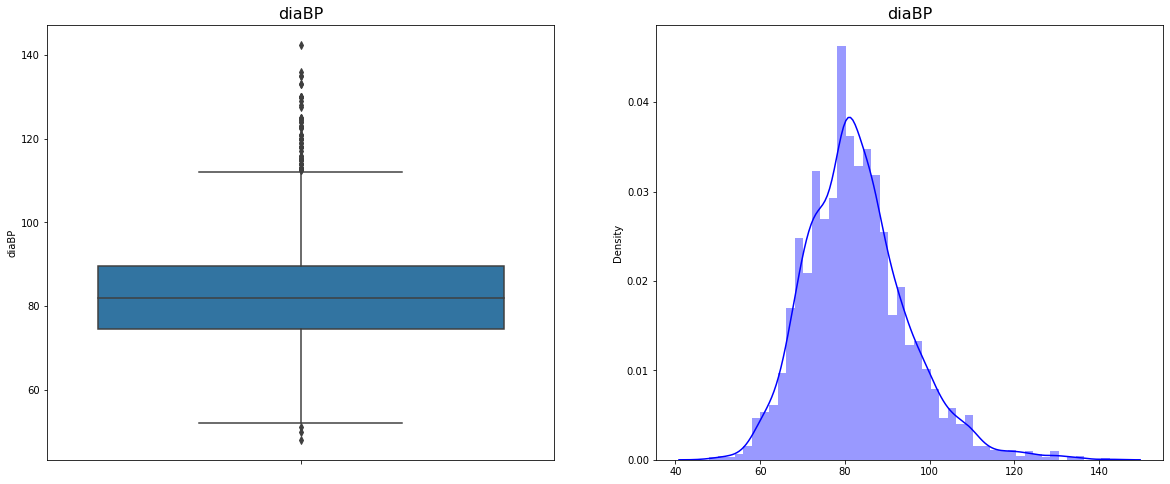

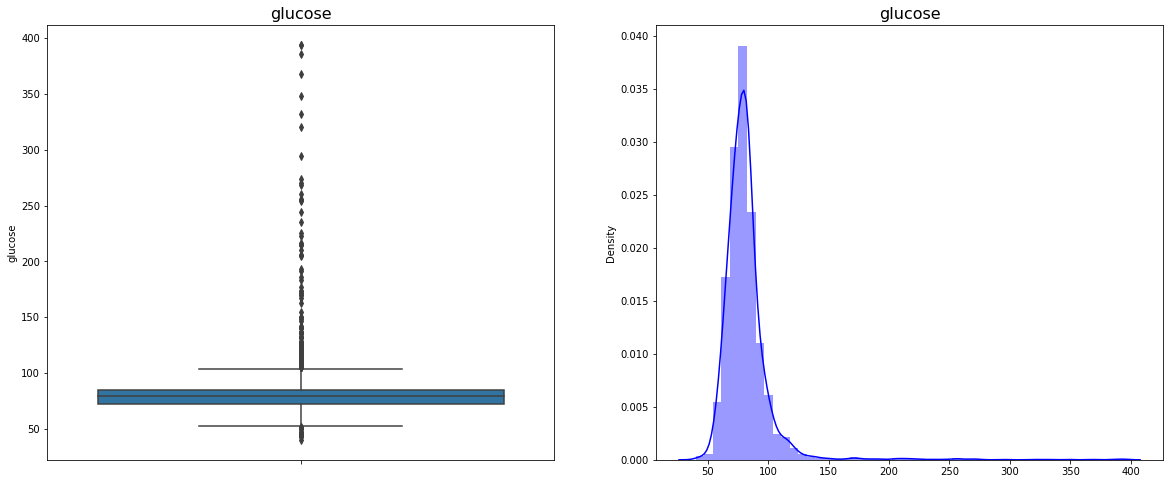

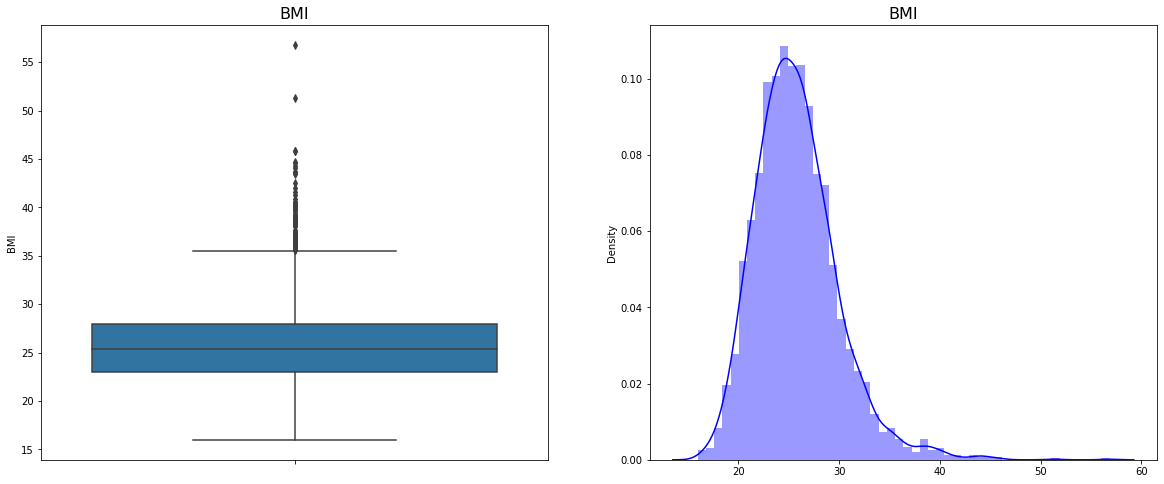

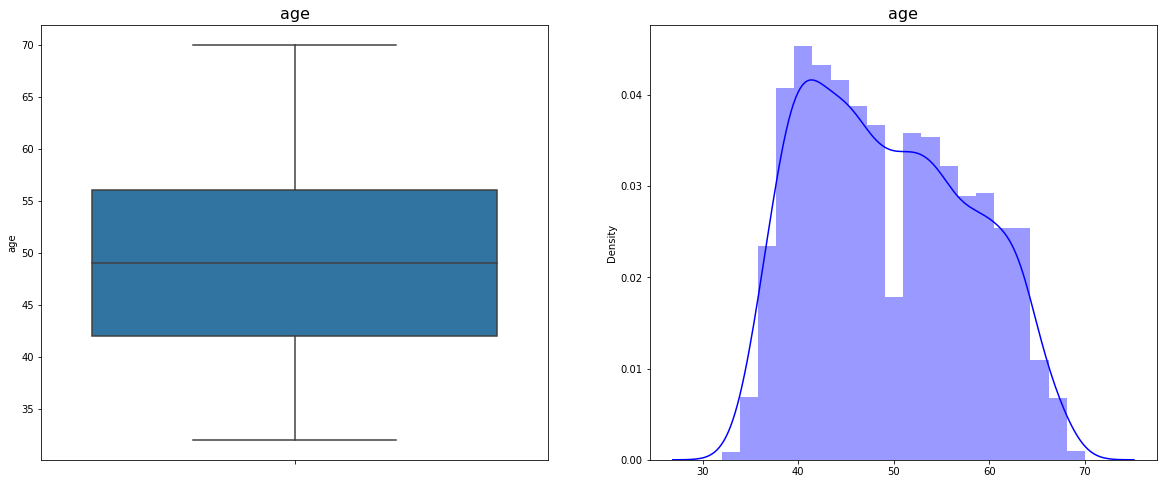

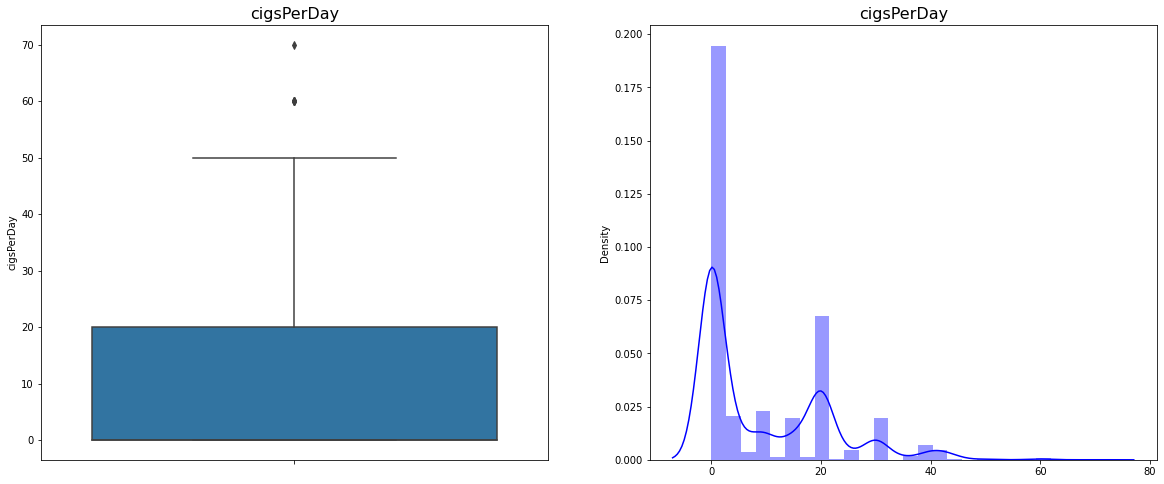

In [ ]:
#Use for loop to plot the distribution and outliers of features required for trainig model at once
f = ['totChol','sysBP',	'diaBP','glucose',	'BMI', 'age',	'cigsPerDay']
for i in new_df[f]:

#Use boxplot to visualize the outliers
  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)
  fig = sns.boxplot(y=new_df[i])
  fig.set_title(i, fontsize=16)
  fig.set_xlabel("")

#Use dist to visualize the distribution 
  plt.subplot(1,2,2)
  sns.distplot(new_df[i],color='blue')
  plt.title(i, fontsize=16)
  plt.xlabel("")
  plt.show()

**From above chart we ccan see that there is outlier's in data except, so before proceeding further we'll treat the outlier.**

#Capping Outlier's

In [ ]:
#Here we are capping Outliers of those feature which are required for training
out = ['totChol','sysBP',	'diaBP','glucose',	'BMI',	'cigsPerDay']
for i in new_df[out]:
  upper_lim = new_df[i].quantile(.95) #quantile 95 means value above 95 we replace by the value of quantile 95%
  lower_lim = new_df[i].quantile(.05) #quantile 5 means value below 5 we replace by the value of quantile 5%
  new_df.loc[(new_df[i] > upper_lim),i] = upper_lim
  new_df.loc[(new_df[i] < lower_lim),i] = lower_lim

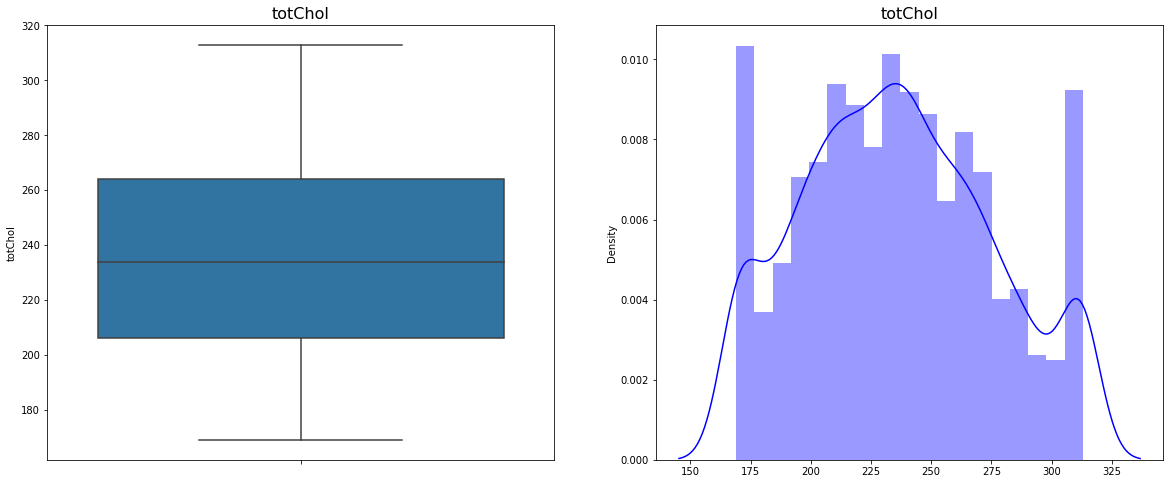

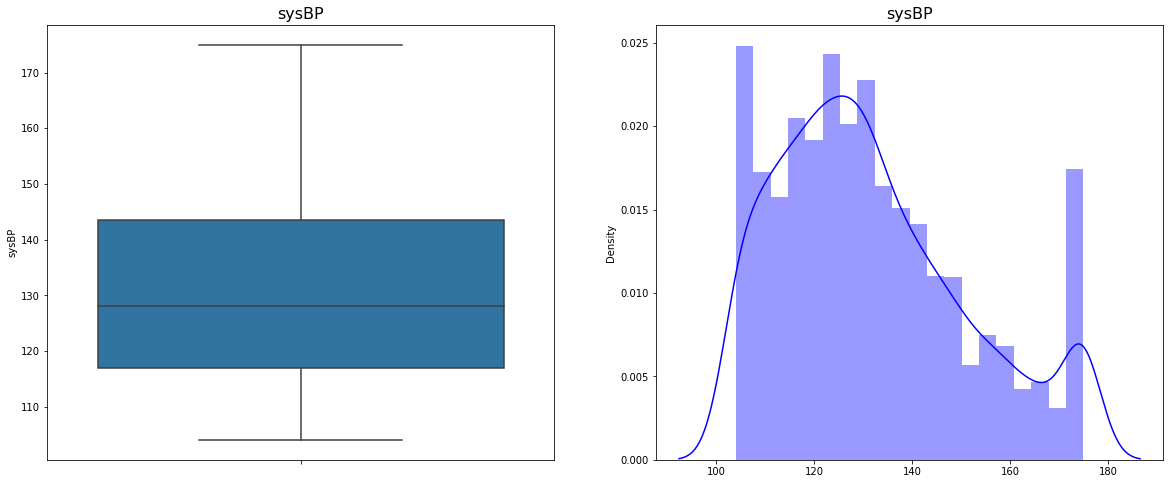

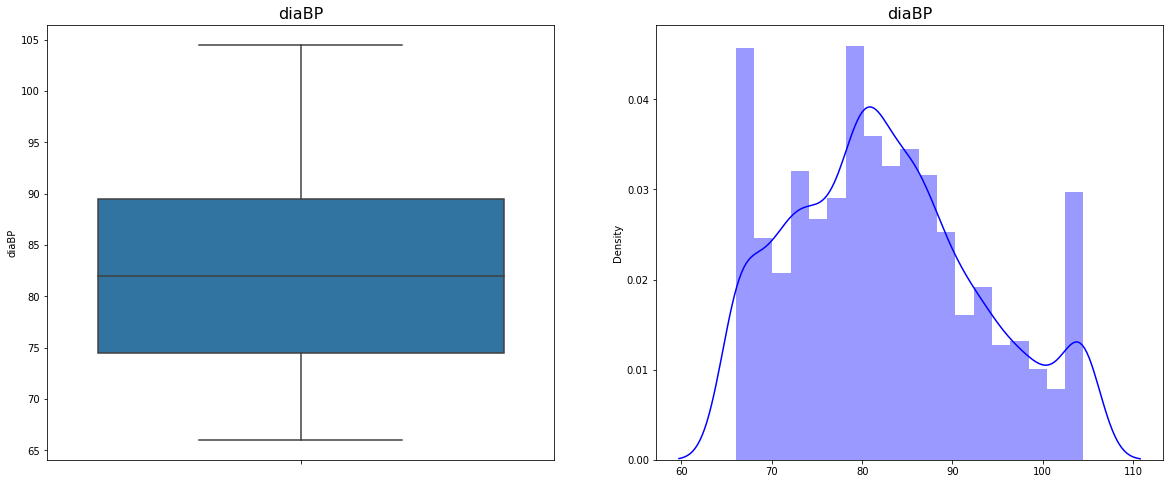

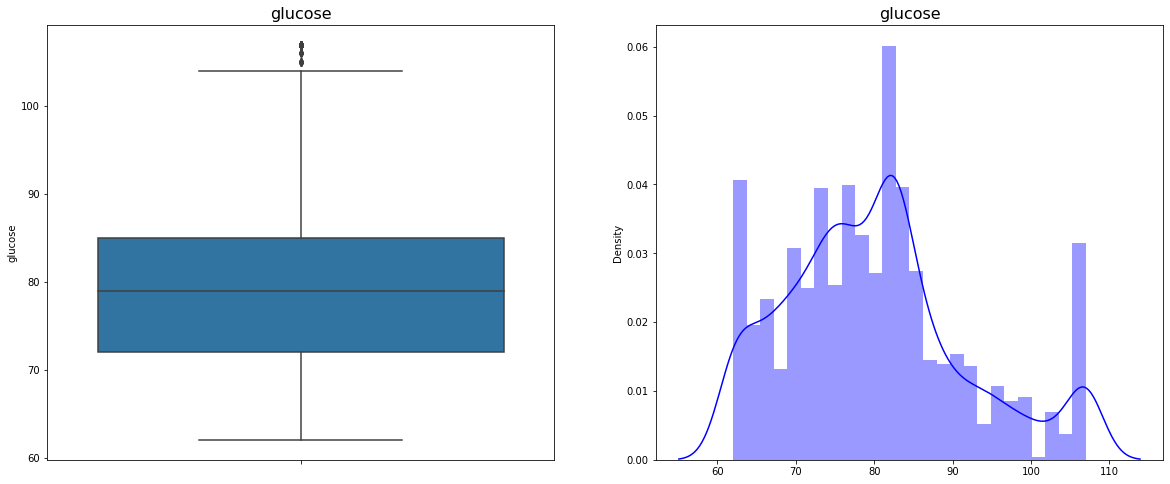

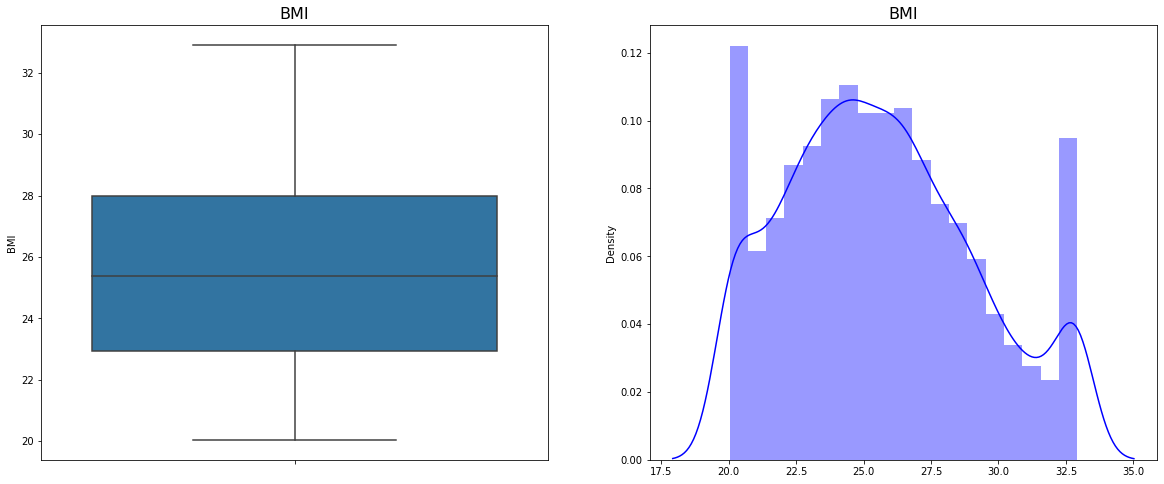

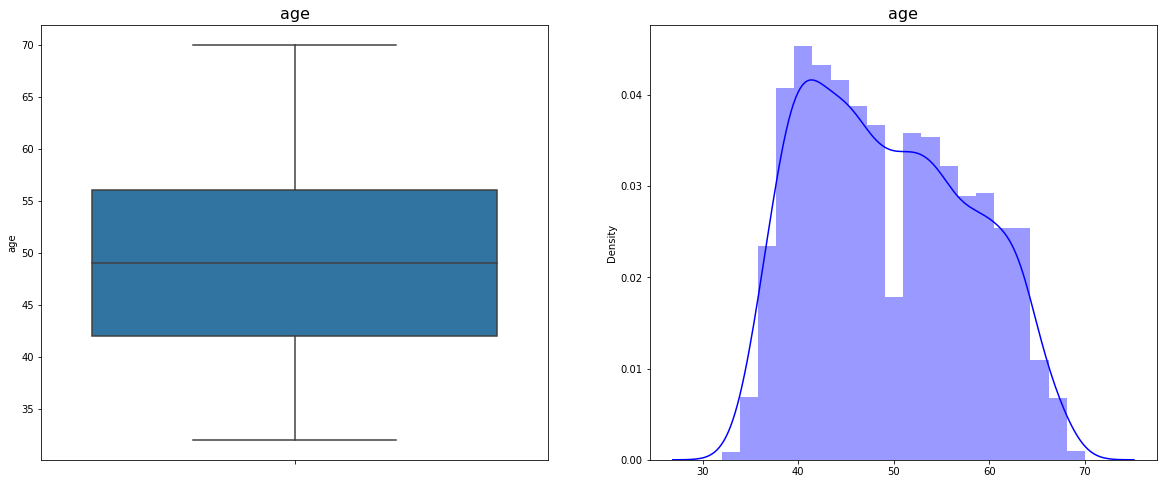

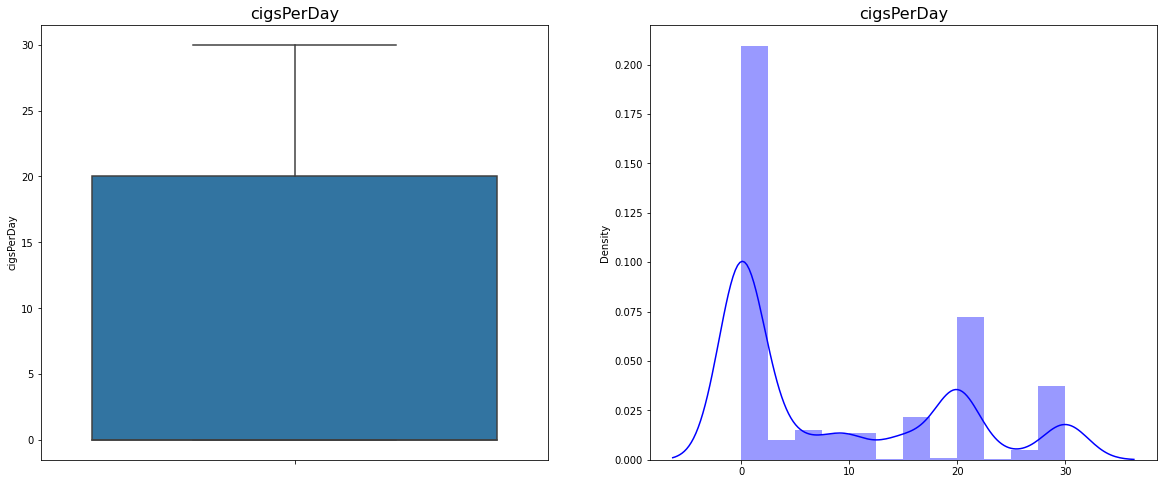

In [ ]:
#Visualizing the ditribution of feature after capping outliers
f = ['totChol','sysBP',	'diaBP','glucose',	'BMI', 'age',	'cigsPerDay']
for j in new_df[f]:

  plt.figure(figsize=(20,8))
  plt.subplot(1,2,1)
  fig = sns.boxplot(y=new_df[j])
  fig.set_title(j, fontsize=16)
  fig.set_xlabel("")

  plt.subplot(1,2,2)
  sns.distplot(new_df[j],color='blue')
  plt.title(j, fontsize=16)
  plt.xlabel("")
  plt.show()

**From above chart we can see now data has minimal outlier's.** 

#Let's see the correlation between every feature on heatmap.

In [ ]:
#columns of dataset
new_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<Axes: >

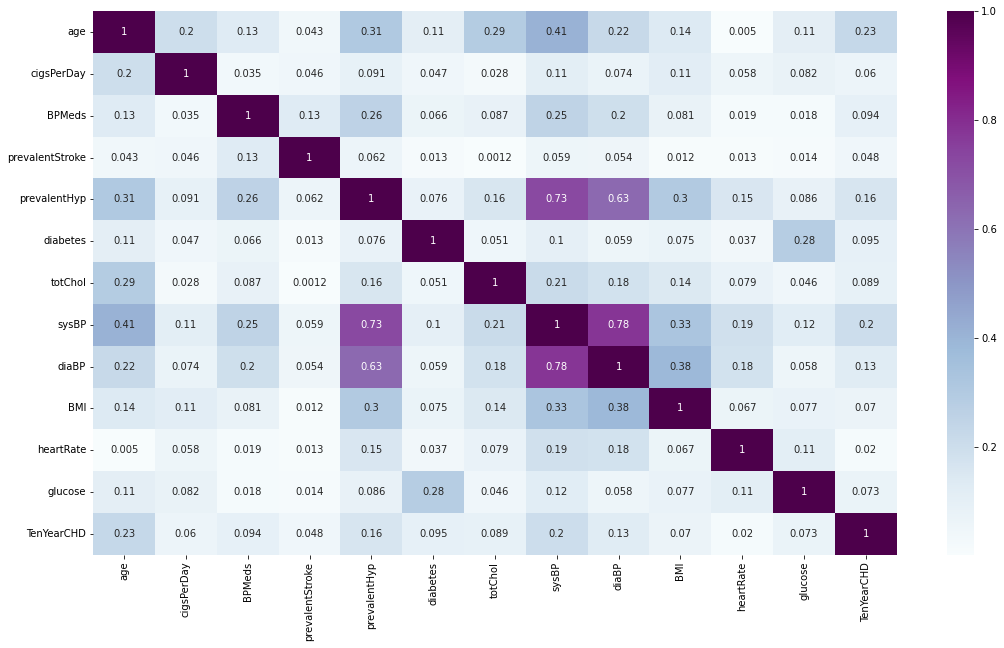

In [ ]:
#correlation plot

plt.figure(figsize=(18,10))
correlation = new_df[['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']].corr()
sns.heatmap(abs(correlation), annot=True, cmap='BuPu')

**Correlation chart is use to check how features are related to each other with respect to target feature.**

**WE will drop some feature on the basis of correlation chart.**

In [ ]:
risk_bp = new_df.groupby(['TenYearCHD','sysBP'])['TenYearCHD'].count()
risk_bp

TenYearCHD  sysBP
0           104.0    151
            105.0     30
            105.5      3
            106.0     21
            106.5      2
                    ... 
1           172.5      2
            173.0      2
            174.0      1
            174.5      1
            175.0     62
Name: TenYearCHD, Length: 247, dtype: int64

#In this dataset some feature is not usefull, so those feature will be dropped.

In [ ]:
#import variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#function for calculating VIF
def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

In [ ]:
#applying calc_vif on dataset to check Vif 
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['id','education','prevalentStroke','diaBP','glucose','heartRate','TenYearCHD']]])

,variables,VIF
0,age,42.577580
1,cigsPerDay,1.676791
2,BPMeds,1.111609
3,prevalentHyp,2.242072
4,diabetes,1.039986
5,totChol,37.501589
6,sysBP,79.746905
7,BMI,48.056357


In [ ]:
new_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,175.0,104.5,32.80,85.0,65.0,1


# Do one_hot_encoding.

In [ ]:
#use value count on feature sex
new_df['sex'].value_counts()

F    1796
M    1393
Name: sex, dtype: int64

In [ ]:
#use pd.get dummies to do one hot encoding on sex, is_smoking
one_hot_df = pd.get_dummies(new_df,columns=['sex', 'is_smoking']) 

**After one hot encoding we stored the dataset in a variable name one_hot_df**

In [ ]:
#first five rows of one_hot_df
one_hot_df.head()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
1,1,36,4.0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1,1,0
2,2,46,1.0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,1
3,3,50,1.0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1,0,1
4,4,64,1.0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,0,1
5,5,61,3.0,0.0,0.0,0,1,0,272.0,175.0,104.5,32.80,85.0,65.0,1,1,0,1,0


In [ ]:
#reset the index of one_hot_df
one_hot_df.reset_index(drop=True,inplace=True)

In [ ]:
#dropping not required feature
one_hot_drop = one_hot_df.drop(['id','education','prevalentStroke','diaBP','glucose','heartRate'], axis = 1)

In [ ]:
one_hot_drop.head(3)

,age,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,BMI,TenYearCHD,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,36,0.0,0.0,1,0,212.0,168.0,29.77,0,0,1,1,0
1,46,10.0,0.0,0,0,250.0,116.0,20.35,0,1,0,0,1
2,50,20.0,0.0,1,0,233.0,158.0,28.26,1,0,1,0,1


**This is our required feature's for training machine learning model. But this data is imbalanced, so we'll balance this data with SMOTE technique.**

**Define dependent & independent variable**

In [ ]:
#dependent variable
dependent_variable = 'TenYearCHD'

In [ ]:
#Coverting all column name in to list
list(set(one_hot_drop.columns.tolist()))

['cigsPerDay',
 'age',
 'TenYearCHD',
 'totChol',
 'BPMeds',
 'BMI',
 'sex_M',
 'sex_F',
 'is_smoking_NO',
 'sysBP',
 'is_smoking_YES',
 'prevalentHyp',
 'diabetes']

In [ ]:
#separating dependent variavle from independent varaible
independent_variable = list(set(one_hot_drop.columns.tolist()) - {dependent_variable})

In [ ]:
#converting independent_variable and dependent_variable as dataframe
X = one_hot_drop[independent_variable].values
y = one_hot_drop[dependent_variable].values


In [ ]:
#check the len of dependent_variable & independent_variable
print(len(y))
print(len(X))

3189
3189


#Balancing data.

#In count plot of target feature we've seen that feature is imbalanced, so we are balancing the featture using smote-Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. 

In [ ]:
#import smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()

#fit predictor and target value
x_smote, y_smote = smote.fit_resample(X, y)



In [ ]:
#After balacing the variables of dataset print len of one_hot_drop and x_smote
print('Original data len', len(one_hot_drop))
print('smote data len', len(x_smote))

Original data len 3189
smote data len 5428


**We've treated outlier and balanced the data. Now finally data is ready for traning.**

#Let's import all the required libraries for processing features and training the data.

In [ ]:
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

**Spltting data into training and testing set** 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote,test_size=0.2,stratify= y_smote, random_state=42)

#Here scaling is important b'coz the unit of measurement  of all features are different.

In [ ]:
#scaling data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#import confusion_matrix, classification_report to check the metrics
from sklearn.metrics import confusion_matrix, classification_report

#Training Classification Models.

In [ ]:
#LogisticRegression
Lo_Reg = LogisticRegression(fit_intercept=True, max_iter=10000)
Lo_Reg.fit(X_train, y_train) #training model

LogisticRegression(max_iter=10000)

In [ ]:
y_pred_train = Lo_Reg.predict(X_train)

In [ ]:
y_pred = Lo_Reg.predict(X_test) #predicting 

In [ ]:
print('Confusion metric')
print(confusion_matrix(y_test,y_pred))
print('classification report')
print(classification_report(y_test,y_pred))


Confusion metric
[[356 187]
 [172 371]]
classification report
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       543
           1       0.66      0.68      0.67       543

    accuracy                           0.67      1086
   macro avg       0.67      0.67      0.67      1086
weighted avg       0.67      0.67      0.67      1086



**From the classification report that the all classification metrics are almost same.**

#In this project detecting 1 is very important. So we'll only focus on the mertics of 1.

In [ ]:
#Calculate import all metrics necessary for evaluating classification 
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'precision: {precision_score(y_test,y_pred)}')
print(f'Recall: {recall_score(y_test,y_pred)}')
print(f'f1_score: {f1_score(y_test,y_pred)}')


precision: 0.6648745519713262
Recall: 0.6832412523020258
f1_score: 0.6739327883742053


**In dectection model of any disease Recall is the most important metric. From all metric we can see that 68.3% of recall and 66.4% precision is achieved. Let's try some other model, to see if metric's got better.**

#Train Decision Tree

In [ ]:
#import decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=9, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=9, random_state=42)

In [ ]:
#predicting using DT model
y_pred = clf.predict(X_test)

In [ ]:
print(f'precision: {precision_score(y_test,y_pred)}')
print(f'Recall: {recall_score(y_test,y_pred)}')
print(f'f1_score: {f1_score(y_test,y_pred)}')

precision: 0.7072310405643739
Recall: 0.7384898710865562
f1_score: 0.7225225225225226


**Yes, we got 73.8% of recall and 70.7% of precision. Metric's are better than previous model.**





#Let's try some ensemble model.

In [ ]:
#import RandomForest & GradientBoosting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Train model with RandomForestClassifier
r_clf = RandomForestClassifier()


In [ ]:
r_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_n = r_clf.predict(X_test)

In [ ]:

print(f'precision: {precision_score(y_test,y_pred_n)}')
print(f'Recall: {recall_score(y_test,y_pred_n)}')
print(f'f1_score: {f1_score(y_test,y_pred_n)}')

precision: 0.900749063670412
Recall: 0.8858195211786372
f1_score: 0.8932219127205199


**we got 88.5% of recall and 90.07% of precision. We got 15% increment in recall and 20% increment in precision than previous model. Metric's are better than previous model**





#Let's GradientBoostingClassifier

In [ ]:
#Gradient Boosting Classifier
g_clf = GradientBoostingClassifier()
g_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
#predict 
y_pred_g = g_clf.predict(X_test)

In [ ]:
#print the metircs
print(f'precision: {precision_score(y_test,y_pred_g)}')
print(f'Recall: {recall_score(y_test,y_pred_g)}')
print(f'f1_score: {f1_score(y_test,y_pred_g)}')

precision: 0.8752556237218814
Recall: 0.7882136279926335
f1_score: 0.8294573643410853


**we got 78.8% of recall and 87.5% of precision. Metric's were better in previous Random forest model**





In [ ]:
#Let's try with XGBOOST
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#predict
y_pred_x = xgb.predict(X_test)

In [ ]:
#Print metrics
print(f'precision: {precision_score(y_test,y_pred_x)}')
print(f'Recall: {recall_score(y_test,y_pred_x)}')
print(f'f1_score: {f1_score(y_test,y_pred_x)}')

precision: 0.9056603773584906
Recall: 0.8839779005524862
f1_score: 0.8946877912395155


**we got 88.3% of recall and 90.5% of precision.**





#Out of all ensemble technique Random Forest is givnig best parameter's.

#Now let's train some non-linear model.

# Train KNN model

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train) #training model
knn.score(X_test, y_test)

0.7974217311233885

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
#print the metrics
print(f'precision: {precision_score(y_test,y_pred_knn)}')
print(f'Recall: {recall_score(y_test,y_pred_knn)}')
print(f'f1_score: {f1_score(y_test,y_pred_knn)}')

precision: 0.7714285714285715
Recall: 0.8453038674033149
f1_score: 0.8066783831282952


**we got 84.5% of recall and 77.1% of precision. Still the Random forest is gave best metric.**





#Let's apply grid search cv in knn, to see if we got good performance.

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
#Run GridSearchCV on training set to know the optimal no of neighbors
knn_cv = GridSearchCV(knn,param_grid,cv=5) # Cross validation 5 time
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.8521400200452875

In [ ]:
knn_cv.best_params_

{'n_neighbors': 1}

#After runnig grid seach cv we got n_neighbors = 1 

In [ ]:
#running KNN on training dataset again but this time n_neighbors is 1 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8830570902394107

In [ ]:
#predicting
y_pred_knn = knn.predict(X_test)

In [ ]:
#print the metrics
print(f'precision: {precision_score(y_test,y_pred_knn)}')
print(f'Recall: {recall_score(y_test,y_pred_knn)}')
print(f'f1_score: {f1_score(y_test,y_pred_knn)}')

precision: 0.8333333333333334
Recall: 0.9576427255985267
f1_score: 0.8911739502999144


**In this detection model 'RECALL' is the most important metric and we got a good recall value of 95.7% using GridSearchCV with Knn.**

#Train model Trough navie bayes.

In [ ]:
#import naive_bayes
from sklearn.naive_bayes import GaussianNB
clf_n = GaussianNB()

In [ ]:
#training naive_bayes model
clf_n .fit(X_train, y_train)

GaussianNB()

In [ ]:
#predicting using naive_bayes model
y_pred_clf_n = clf_n.predict(X_test)

In [ ]:
#print the metrics
print(f'precision: {precision_score(y_test,y_pred_clf_n)}')
print(f'Recall: {recall_score(y_test,y_pred_clf_n)}')
print(f'f1_score: {f1_score(y_test,y_pred_clf_n)}')

precision: 0.7272727272727273
Recall: 0.5451197053406999
f1_score: 0.6231578947368421


**Naive bayes not giving satifactory result, infact it's recall value is lowest.**

#Train the model with Support Vector Machine.



In [ ]:
#import Support Vector Machine
from sklearn.svm import SVC
scv = SVC(kernel='rbf',C=186) #the radial basis function kernel, 
scv.fit(X_train, y_train)

SVC(C=186)

**RBF Kernel is popular because of its similarity to K-Nearest Neighborhood Algorithm. It has the advantages of K-NN and overcomes the space complexity problem as RBF Kernel Support Vector Machines just needs to store the support vectors during training and not the entire dataset.**

In [ ]:
#predict using svc model
y_pred_s= scv.predict(X_test)

In [ ]:
#print the classification metrics
print(f'precision: {precision_score(y_test,y_pred_s)}')
print(f'Recall: {recall_score(y_test,y_pred_s)}')
print(f'f1_score: {f1_score(y_test,y_pred_s)}')

precision: 0.8565815324165029
Recall: 0.8029465930018416
f1_score: 0.8288973384030418


**Here we got Recall of 80.2% and precision of 85.6%. It's a good model, but KNN gave the best result.** 

#**Conclusion**

**In this project we found out that age is the biggest factor of having developing cardio vascular risk, and all other factors may increase the cardio vascular risk at that age.**

**In this dataset male who smokes are more tha the man who do not smoke and their are less female who smokes than the female who do not smokes. According to overall data male smoke's more.**

#Summary of the Models.

**People age of 48 to 51 can have cardio vascular risk within 10 years.**

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name", "Precision", "Recall", "F1 score"]) 
  
# Add rows 
myTable.add_row(['1',"Logistic Regression","0.67", "0.66", "0.66"]) 
myTable.add_row(['2',"Decision Tree", "70.7", "73.8", "72"])
myTable.add_row(['3',"Random Forest", "90", "88.5", "89.3"])
myTable.add_row(['4',"Gradient Boosting", "90", "88.3", "89.4"])
myTable.add_row(['5',"KNN-n_neighbors = 1", "83.3", "95.7", "89.1"])
myTable.add_row(['6',"Naive Bayes", "72.7", "54.5", "62.3"])
myTable.add_row(['6',"SVM", "85.6", "80.2", "82.8"])
print(myTable)


+--------+---------------------+-----------+--------+----------+
| SL No. |      Model_Name     | Precision | Recall | F1 score |
+--------+---------------------+-----------+--------+----------+
|   1    | Logistic Regression |    0.67   |  0.66  |   0.66   |
|   2    |    Decision Tree    |    70.7   |  73.8  |    72    |
|   3    |    Random Forest    |     90    |  88.5  |   89.3   |
|   4    |  Gradient Boosting  |     90    |  88.3  |   89.4   |
|   5    | KNN-n_neighbors = 1 |    83.3   |  95.7  |   89.1   |
|   6    |     Naive Bayes     |    72.7   |  54.5  |   62.3   |
|   6    |         SVM         |    85.6   |  80.2  |   82.8   |
+--------+---------------------+-----------+--------+----------+


#IN this project we are taking Recall as final metric b'coz classifying a person whether or not have cardio vascular risk within 10 years, recall is important.

#KNN is the final model we've selected for this project b'coz its recall value is the highest. 